# NYC Trees Dataset Summary

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/trees-census.csv')

### Row count/width

In [3]:
df.shape

(683788, 42)

### Schema

In [4]:
df.dtypes

created_at     object
tree_id         int64
block_id        int64
the_geom       object
tree_dbh        int64
stump_diam      int64
curb_loc       object
status         object
health         object
spc_latin      object
spc_common     object
steward        object
guards         object
sidewalk       object
user_type      object
problems       object
root_stone     object
root_grate     object
root_other     object
trnk_wire      object
trnk_light     object
trnk_other     object
brnch_ligh     object
brnch_shoe     object
brnch_othe     object
address        object
zipcode         int64
zip_city       object
cb_num          int64
borocode        int64
boroname       object
cncldist        int64
st_assem        int64
st_senate       int64
nta            object
nta_name       object
boro_ct         int64
state          object
Latitude      float64
longitude     float64
x_sp          float64
y_sp          float64
dtype: object

### Unique IDs

In [5]:
id_block = df[['tree_id', 'block_id']].astype('str')
id_block.describe()

,tree_id,block_id
count,683788,683788
unique,683788,101390
top,407295,204850
freq,1,450


# Trees by species and borough

In [6]:
df_alive = df[df['status'] == 'Alive']

In [7]:
df_alive.shape

(652173, 42)

In [8]:
def group_by(df, colname, percision=2):
    size = df.groupby([colname]).size()
    percent = round(size / len(df), percision)
    percent_fmt = percent.apply(lambda x: f'{str(x*100)}%') 

    new_df = pd.concat([size, percent_fmt], axis=1)
    new_df.columns = ['Count', 'Percent of Total']
    return new_df


### By borough

In [9]:
group_by(df_alive, 'boroname')

,Count,Percent of Total
boroname,,
Bronx,80585,12.0%
Brooklyn,169744,26.0%
Manhattan,62427,10.0%
Queens,237974,36.0%
Staten Island,101443,16.0%


### By species

In [10]:
group_by(df_alive, 'spc_common', percision=2)

,Count,Percent of Total
spc_common,,
'Schubert' chokecherry,4888,1.0%
American beech,273,0.0%
American elm,7975,1.0%
American hophornbeam,1081,0.0%
American hornbeam,1517,0.0%
American larch,46,0.0%
American linden,13530,2.0%
Amur cork tree,183,0.0%
Amur maackia,2197,0.0%


# Tree diameter

In [11]:
import matplotlib
import numpy as np

In [12]:
l = np.arange(0.1, 1.0, 0.1)
percentiles = df['tree_dbh'].quantile(l)

### Distribution by percentiles

In [13]:
percentiles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     7.0
0.5     9.0
0.6    11.0
0.7    14.0
0.8    18.0
0.9    24.0
Name: tree_dbh, dtype: float64

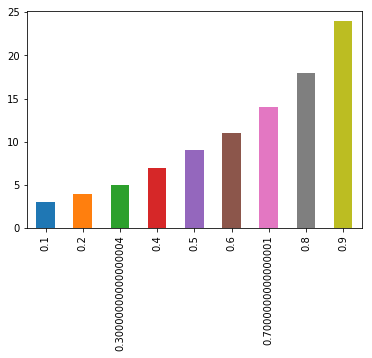

In [18]:
percentiles.plot.bar(x='p', y='d')

### Histogram

*Outliers greater than diameter of 50 are ignored

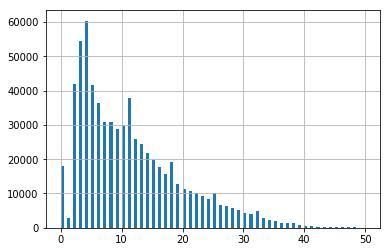

In [30]:
df['tree_dbh'].hist(range=[0, 50], bins=100)